<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Transfer_Learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On Transfer Learning with VGG16**

<BR>

<BR>

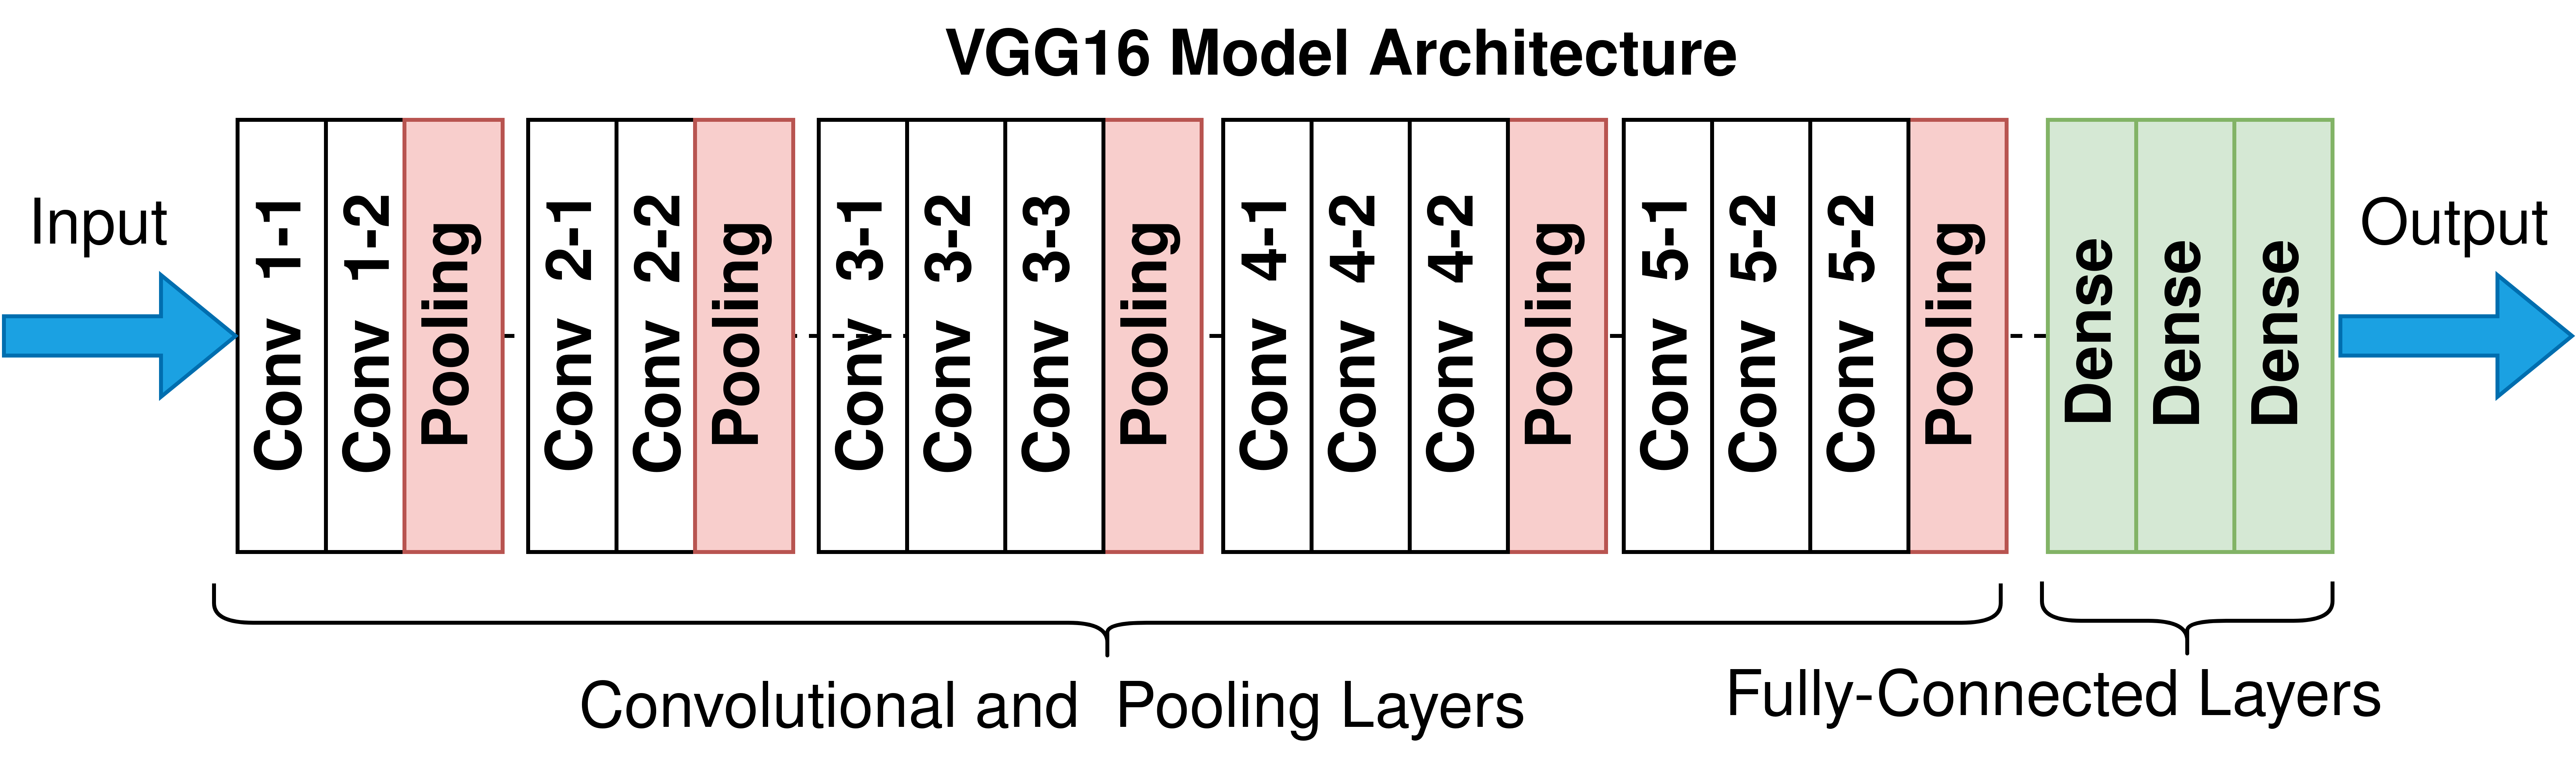

<br>

## Loading our dataset from TensorFlow:

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
                                                              split=["train[:70%]", "test[:30%]"], ## Train test split
                                                              batch_size=-1,
                                                              as_supervised=True,  # Include labels
                                                              )

## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

## Now we can load the VGG16 model.

In [ ]:
# https://keras.io/api/applications/

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Now we add the last layers for our specific problem.

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

## Compile and Fit the model.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(train_ds, train_labels, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es])


Epoch 1/20
65/65 [==============================] - 560s 9s/step - loss: 1.7583 - accuracy: 0.3878 - val_loss: 1.3091 - val_accuracy: 0.4377
Epoch 2/20
65/65 [==============================] - 553s 9s/step - loss: 1.1548 - accuracy: 0.5075 - val_loss: 1.3129 - val_accuracy: 0.4942
Epoch 3/20
65/65 [==============================] - 553s 9s/step - loss: 1.0319 - accuracy: 0.5859 - val_loss: 1.3080 - val_accuracy: 0.5817
Epoch 4/20
65/65 [==============================] - 552s 9s/step - loss: 0.8051 - accuracy: 0.6905 - val_loss: 1.1626 - val_accuracy: 0.6128
Epoch 5/20
65/65 [==============================] - 553s 9s/step - loss: 0.6978 - accuracy: 0.7221 - val_loss: 1.3671 - val_accuracy: 0.6187
Epoch 6/20
65/65 [==============================] - 552s 9s/step - loss: 0.5599 - accuracy: 0.7727 - val_loss: 1.2804 - val_accuracy: 0.6362
Epoch 7/20
65/65 [==============================] - 553s 9s/step - loss: 0.4759 - accuracy: 0.8005 - val_loss: 1.4800 - val_accuracy: 0.6459
Epoch 8/20
65